# PROYECTO DATA SCIENCE III: NLP
<u>Alumno:</u> *Matias Schinner*  
<u>Comisión:</u> 61715

**<u>Objetivo</u>:** Desarrollo de los temas vistos en el area de Procesamiento de lenguaje natural en un dataset de reseñas de bebidas alcoholicas obtenido de Kaggle.

Se desarrollará tratamientos tipicos como exploración/EDA, limpieza de datos, visualizaciones.  
Como paso final se entrenarán modelos de clasificación con los datos y se evaluará la performance de los mismos frente a nuevas sentencias de reseñas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Carga del dataset
url = "https://raw.githubusercontent.com/MatiasSch97/proyects_DS/main/DS3-DL_NLP/NLP/wine%20reviews.csv" #Ubicación del archivo csv que contiene las reviews
df = pd.read_csv(url)

##Análisis exploratorio de los datos

In [ ]:
df.head(10)

,Sl.No.,Brand,Name,Reviews Date Added,Reviews do Recommend,Reviews Num Helpful,Reviews Rating,Reviews Text,Reviews Title,Weight
0,1,Gallo,Ecco Domani174 Pinot Grigio - 750ml Bottle,2018-01-09T13:24:04Z,True,1.0,5.0,This a fantastic white wine for any occasion!,My Favorite White Wine,1.0 lbs
1,2,Fresh Craft Co.,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,2018-01-09T17:31:52Z,True,NaN,5.0,"Tart, not sweet...very refreshing and delicious!",Yum!!,2.45 lbs
2,3,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,2018-01-09T17:31:51Z,True,NaN,5.0,I was given this wine so it was a delightful s...,A New Favorite!,3.09 lbs
3,4,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,2017-10-04T18:03:12Z,True,NaN,5.0,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",3.09 lbs
4,5,Wine Cube153,Pink Moscato - 3l Bottle - Wine Cube153,2018-01-10T18:06:29Z,True,1.0,5.0,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",1.0 lbs
5,6,Beck's Na,Beck's174 Non Alcoholic Beer - 6pk / 12oz Bottles,2018-01-10T18:59:18Z,True,NaN,5.0,I LOVE Becks NA. It tastes just like a regular...,Great Taste,1.0 lbs
6,7,Gallo,Apothic174 Red Blend - 750ml Bottle,2018-01-09T21:14:31Z,NaN,1.0,3.0,This wine has a wonderful but strong aroma its...,Simply Wonderful,1.0 lbs
7,8,Gallo,Apothic174 Red Blend - 750ml Bottle,2017-12-15T00:02:24Z,NaN,1.0,2.0,I would give one more star if it came clean on...,A Sweet Red.,1.0 lbs
8,9,California Roots,California Roots Moscato White Wine - 750ml,2018-01-09T13:24:06Z,True,0.0,5.0,Delicious and very affordable,NaN,2.65 lbs
9,10,Charles Charles,Charles Charles174 Red Blend - 750ml Bottle,2018-01-09T17:31:51Z,True,NaN,5.0,This is a very smooth red with Aromas of cocoa...,Charles & Charles Red Blend,1.0 lbs


###Eliminación de datos

Revisión de datos duplicados:

In [ ]:
df.duplicated().sum()

np.int64(0)

Remoción de dato duplicado:

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

A simple vista se puede ver que hay que trabajar en el index del dataset y revisar datos faltantes.

In [ ]:
def Porcentaje_de_valores_faltantes(df):
  for col in df.columns:
    conteo_faltantes = df[col].isnull().sum()
    filas_totales = len(df)
    porcentaje_faltante = (conteo_faltantes / filas_totales) * 100
    print(f"Column '{col}': {porcentaje_faltante:.2f}% valores faltantes")

Porcentaje_de_valores_faltantes(df)

Column 'Sl.No.': 0.00% valores faltantes
Column 'Brand': 2.25% valores faltantes
Column 'Name': 0.00% valores faltantes
Column 'Reviews Date Added': 0.00% valores faltantes
Column 'Reviews do Recommend': 33.88% valores faltantes
Column 'Reviews Num Helpful': 78.34% valores faltantes
Column 'Reviews Rating': 15.40% valores faltantes
Column 'Reviews Text': 0.03% valores faltantes
Column 'Reviews Title': 1.52% valores faltantes
Column 'Weight': 65.54% valores faltantes


Comprobando los valores se detectan varias columnas que contienen altos valores de datos faltantes.
Varias de estas columnas, entre ellas Reviews Num Helpful, Reviews do Recommend, Weight, no aportan valor al análisis por lo que se eliminaran.

Se eliminará tambien la columna S1.No. con el fin de conservar solo un index en la tabla.

In [ ]:
columnas_eliminar = ['Sl.No.', 'Reviews do Recommend', 'Reviews Num Helpful', 'Weight']
df = df.drop(columns=columnas_eliminar, axis=1)

In [ ]:
df.head(5)

,Brand,Name,Reviews Date Added,Reviews Rating,Reviews Text,Reviews Title
0,Gallo,Ecco Domani174 Pinot Grigio - 750ml Bottle,2018-01-09T13:24:04Z,5.0,This a fantastic white wine for any occasion!,My Favorite White Wine
1,Fresh Craft Co.,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,2018-01-09T17:31:52Z,5.0,"Tart, not sweet...very refreshing and delicious!",Yum!!
2,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,2018-01-09T17:31:51Z,5.0,I was given this wine so it was a delightful s...,A New Favorite!
3,1000 Stories,1000 Stories174 Zinfandel - 750ml Bottle,2017-10-04T18:03:12Z,5.0,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious"
4,Wine Cube153,Pink Moscato - 3l Bottle - Wine Cube153,2018-01-10T18:06:29Z,5.0,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!"


In [ ]:
df = df[df['Brand'].str.lower() != 'carmex']

###Datos sobre el dataset

Tamaño del dataset:  
(Filas, Columnas)

In [ ]:
df.shape

(1845, 6)

Información:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1845 entries, 0 to 2889
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               1780 non-null   object 
 1   Name                1845 non-null   object 
 2   Reviews Date Added  1845 non-null   object 
 3   Reviews Rating      1420 non-null   float64
 4   Reviews Text        1844 non-null   object 
 5   Reviews Title       1802 non-null   object 
dtypes: float64(1), object(5)
memory usage: 100.9+ KB


In [ ]:
df.columns

Index(['Brand', 'Name', 'Reviews Date Added', 'Reviews Rating', 'Reviews Text',
       'Reviews Title'],
      dtype='object')

In [ ]:
df['Reviews Rating'].value_counts()

,count
Reviews Rating,
5.0,1107
4.0,161
1.0,62
3.0,48
2.0,42


### Visualizaciones

**Distribución de puntajes:**


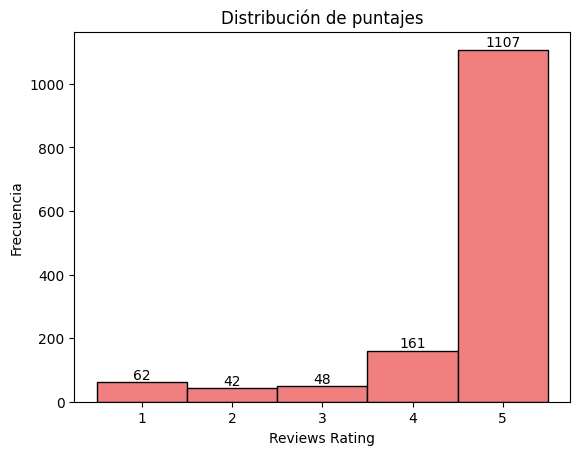

In [ ]:
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
n, bins, patches = plt.hist(df['Reviews Rating'], bins=bins, color='lightcoral', edgecolor='black')

plt.title('Distribución de puntajes')
plt.xlabel('Reviews Rating')
plt.ylabel('Frecuencia')

for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, n[i], int(n[i]), ha='center', va='bottom')

plt.xticks([1, 2, 3, 4, 5])
plt.show()

Tener muchas reseñas con 5 estrellas puede dificultar al modelo ya entrenado a detectar correctamente reseñas bajas debido a que se entrenó con menor cantidad de malas reseñas.

**Top marcas con más reseñas:**



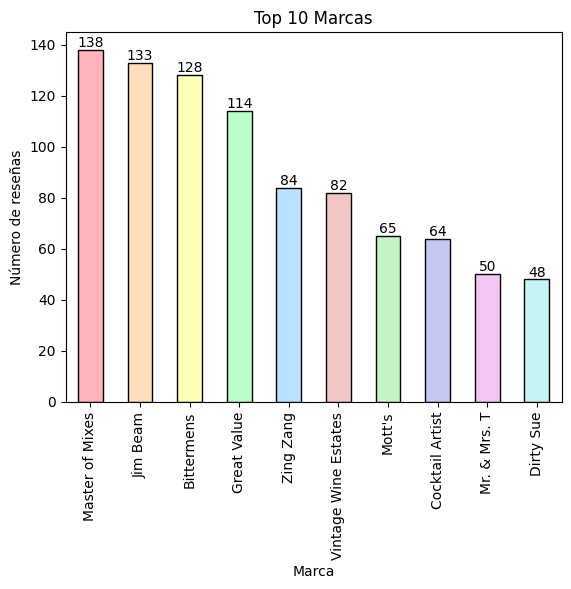

In [ ]:
top_brands = df['Brand'].value_counts().head(10)
ax = top_brands.plot(kind='bar', color=['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#f3c6c6', '#c6f3c6', '#c6c6f3', '#f3c6f3', '#c6f3f3'], edgecolor='black')
plt.title('Top 10 Marcas')
plt.xlabel('Marca')
plt.ylabel('Número de reseñas')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [ ]:
df['Reviews Rating'][df['Brand'] == 'Master of Mixes'].value_counts()

,count
Reviews Rating,
5.0,62
4.0,8
3.0,6
2.0,4
1.0,1


In [ ]:
df['Reviews Rating'][df['Brand'] == 'Master of Mixes'].mean()

np.float64(4.555555555555555)

##Preprocesamiento NLP

Selección de la columna de texto:

In [ ]:
#Recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
texts = df['Reviews Text'].astype(str)
texts.sample(5).tolist()

['Some of the best tasting Margarita mix I have used. Highly recommend.',
 'Addictively tasty!',
 "Delicious. I recently went through a dirty martini phase and was frustrated with the inconsistent quality of my drinks. Some were fabulous while others tasted outright disgusting. A waste of precious quality vodka. I quickly figured out that for me, only salt brines will do. No vinegar.I was discarding a lot of expensive olives for the sake of a few drinks and thought surely there must be a source for brine only. I read reviews and ingredient lists until finding Dirty Sue. This product ain't cheap (it's salt water after all) but I was not disappointed. Like I said before, NO VINEGAR. I'm very pleased. Will be purchasing several bottles for Christmas and pairing them with a nice Vodka as gifts.",
 'Cool idea for a party.',
 "This is Beam at it's best very smooth."]

In [ ]:
def preprocess(txt):
    txt = re.sub(r'[^a-zA-Z\s]', '', str(txt)) #Eliminar caracteres no alfabéticos

    tokens = word_tokenize(txt) # Tokenizar

    tokens = [t.lower() for t in tokens if t.lower() not in stop_words] # Pasar a minúsculas y eliminar stopwords

    tokens = [lemmatizer.lemmatize(t) for t in tokens] #Lematizar

    cleaned = ' '.join(tokens)

    return cleaned

## Aplicación del preprocesamiento a nuestro texto

In [ ]:
df['clean_text'] = df['Reviews Text'].apply(preprocess) #Aplicamos el preprocesamiento de txt

In [ ]:
display(df[['Reviews Text', 'clean_text']].head())

,Reviews Text,clean_text
0,This a fantastic white wine for any occasion!,fantastic white wine occasion
1,"Tart, not sweet...very refreshing and delicious!",tart sweetvery refreshing delicious
2,I was given this wine so it was a delightful s...,given wine delightful surprise find flavorful ...
3,This is a phenomenal wine and my new favorite ...,phenomenal wine new favorite red
4,4 750ml bottles for the price of two With way ...,ml bottle price two way less packaging yes ple...


Aquí podemos ver las diferencias entre el Reviews Text, texto no procesado y clean_text, texto procesado.

##WordCloud

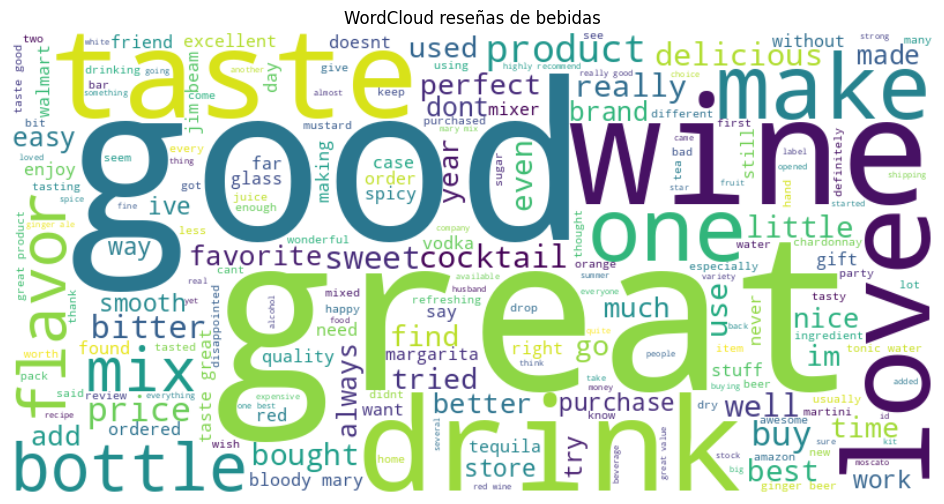

In [ ]:
corpus = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud reseñas de bebidas')
plt.show()

Tenemos palabras como good, wine, great, indicando sentimiento positivo en las reseñas.
Puede que estas palabras sean las más utilizadas debido a que, como vimos anteriormente, hay muchas más reseñas positivas que negativas.

In [ ]:
corpus

'fantastic white wine occasion tart sweetvery refreshing delicious given wine delightful surprise find flavorful delicious taste new favorite phenomenal wine new favorite red ml bottle price two way less packaging yes please nervous good true wouldnt like wine fantastic go bit way get live near state line isnt sold state due liquor law worth love beck na taste like regular ale smell like one taste great na drink friend love great head pour wine wonderful strong aroma bit bitter bite still goodit worth end would give one star came clean bottle called sweet red instead get poetic grandiose blend standard practice get dash grape juice concentrate sweeten also loos star price rather look side target shelf pickup lambrusco less delicious affordable smooth red aroma cocoa coffee tobacco sweet black cherry bold soft highly recommend one based positive review served fancy pant variety recent party guest loved since wine expert provide detail variety fancy pant website like sunshine glass brisk

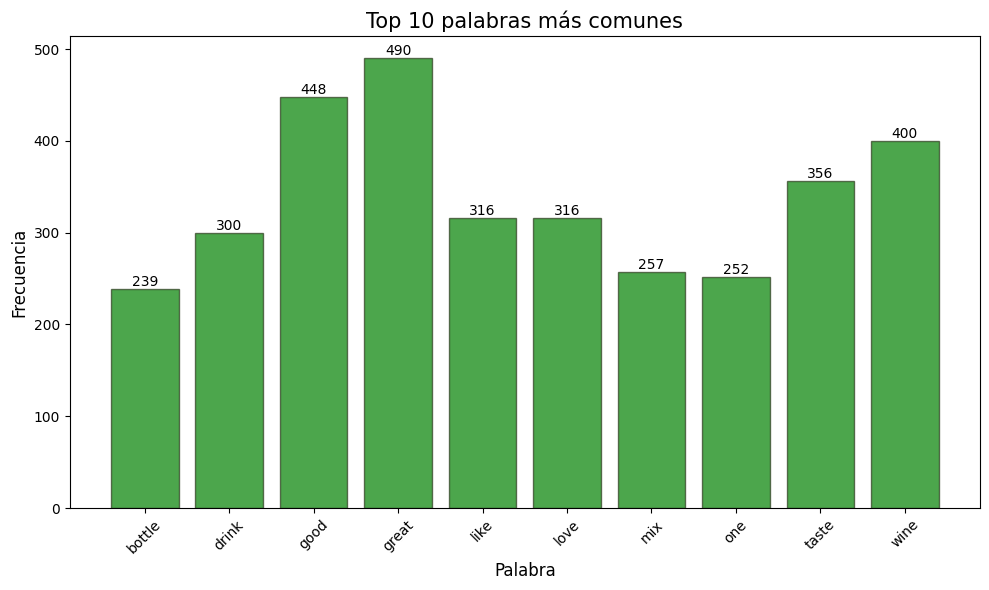

In [ ]:
vectorizer = CountVectorizer(max_features=10)
X_uni = vectorizer.fit_transform(df['clean_text'])
uni_features = vectorizer.get_feature_names_out()
uni_counts = X_uni.sum(axis=0).A1

# Plot customizado
plt.figure(figsize=(10,6))
bars = plt.bar(uni_features, uni_counts, color='Green', alpha=0.7, edgecolor='#2d3c1e')
plt.xlabel('Palabra', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frecuencia', fontsize=12)
plt.yticks(fontsize=10)
plt.title('Top 10 palabras más comunes', fontsize=15)
for bar, freq in zip(bars, uni_counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(freq), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

###Segmentación de reseñas:
Definiremos como reseña de sentimiento positivo a aquella que tenga puntaje mayor o igual a 4 y como reseña de sentimiento negativo a las menores a 4.

*NOTA: Se podría también análizar en 3 catégorias: Sentimiento postivo, neutral y negativo utilizando los puntajes:*
- *Menor a 4 = Positivo*
- *3 = Neutral*
- *Mayor a 3 = Negativo*

*Debido a fines prácticos solo se dividiran en sentimiento positivo y negativo.*

**Creacion de etiqueta binaria:**

In [ ]:
df['sentiment_label'] = df['Reviews Rating'].apply(lambda x: 1 if x >= 3 else 0)
print(df['sentiment_label'].value_counts())

sentiment_label
1    1316
0     529
Name: count, dtype: int64


Aquí ya se encuentra aplicado en el dataset una nueva columna identificada como sentiment_label, la cual indica 1 si el sentimiento en la review es positiva o 0 si la review es de sentimiento negativo.

**Volviendo a los WordCloud:**
Ahora aplicamos un wordcloud para cada sentimiento: Positivo y negativo.

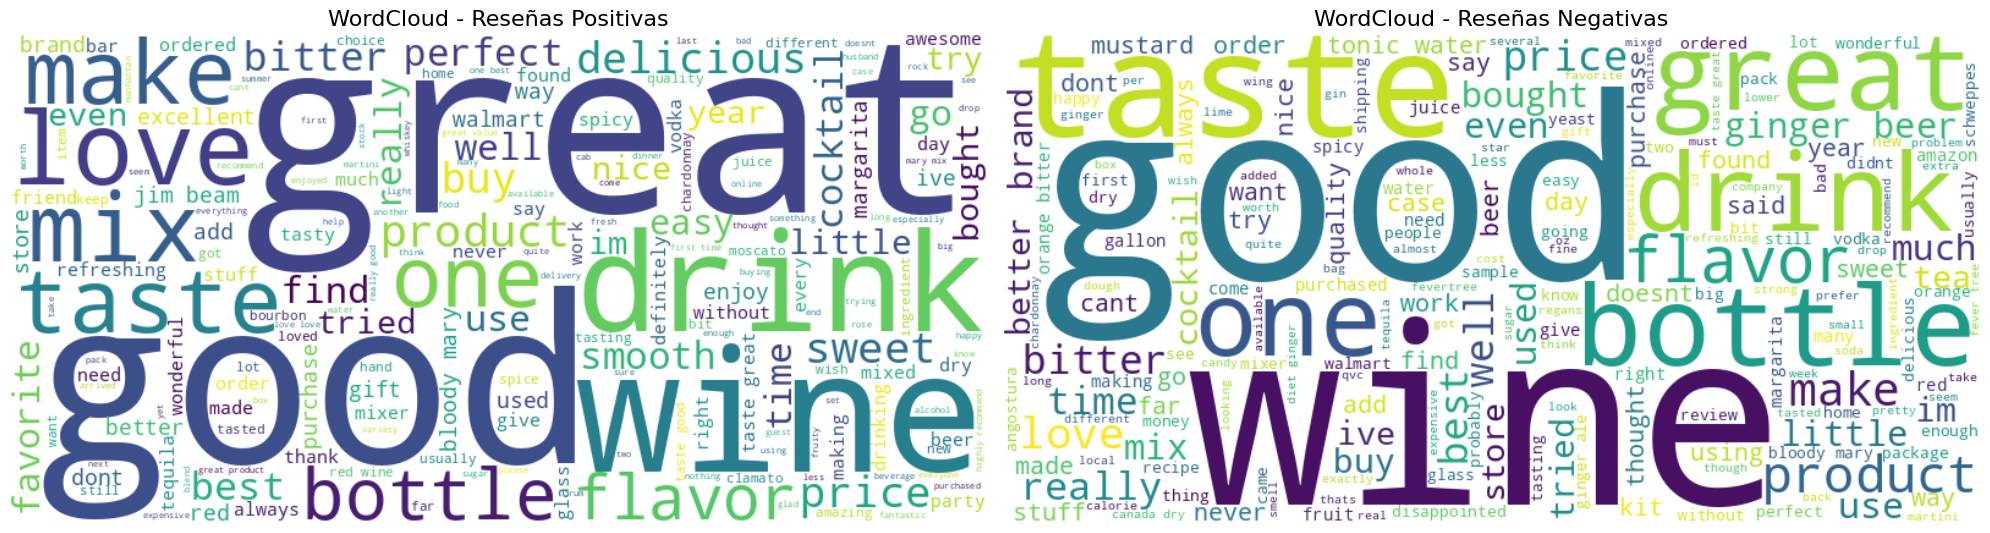

In [ ]:
plt.figure(figsize=(20,8))
for i, (label, title) in enumerate([(1, 'Positivas'), (0, 'Negativas')]):
    subset_text = ' '.join(df.loc[df['sentiment_label'] == label, 'clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(subset_text)
    ax = plt.subplot(1, 2, i+1)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'WordCloud - Reseñas {title}', fontsize=16)
plt.tight_layout()
plt.show()

##N-Gramas:
Son secuencias de palabras consecutivas en un texto. Ayudan a comprender mejor el contexto del corpus de texto en vez de solo las palabras individuales

In [ ]:
def get_top_ngrams(corpus, ngram_range=(2,2), top_n=5):
    vec = CountVectorizer(ngram_range=ngram_range, max_features=1000)
    X = vec.fit_transform(corpus)
    ngrams = vec.get_feature_names_out()
    counts = X.sum(axis=0).A1
    df_ngrams = pd.DataFrame({
        'ngram': ngrams,
        'count': counts
    })
    return df_ngrams.sort_values('count', ascending=False).head(top_n)

<ipython-input-85-05df151bae54>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=top5_bigrams, palette='viridis')


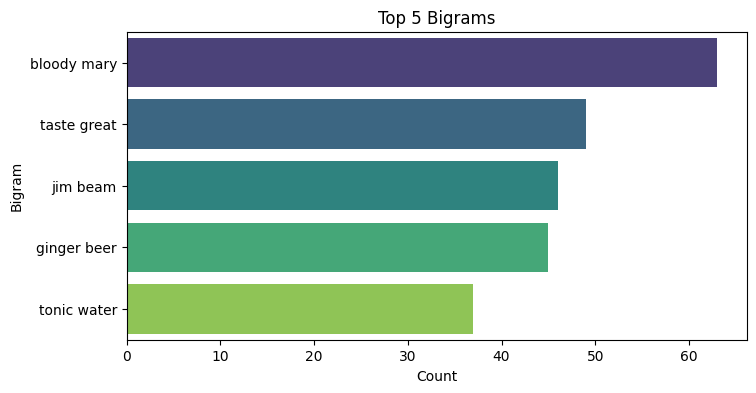

In [ ]:
# Top 5 Bigramas
top5_bigrams = get_top_ngrams(df['clean_text'], ngram_range=(2,2), top_n=5)
plt.figure(figsize=(8,4))
sns.barplot(x='count', y='ngram', data=top5_bigrams, palette='viridis')
plt.title('Top 5 Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

<ipython-input-86-8aeef892430d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=top5_trigrams, palette='magma')


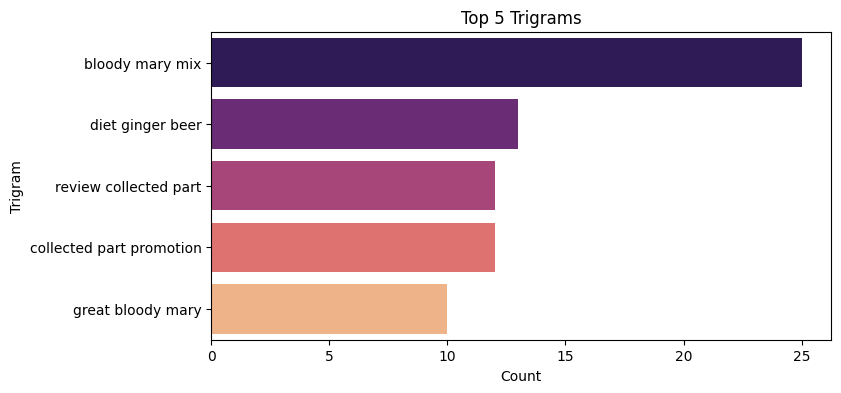

In [ ]:
# Top 5 Trigramas
top5_trigrams = get_top_ngrams(df['clean_text'], ngram_range=(3,3), top_n=5)
plt.figure(figsize=(8,4))
sns.barplot(x='count', y='ngram', data=top5_trigrams, palette='magma')
plt.title('Top 5 Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

##Análisis de sentimiento:
TextBlop:
Asigna un puntaje de **polaridad** entre -1 (negativo) y 1 (positivo) a un texto.  
Además asigna un puntaje de **subjetividad**, la cual es una métrica que indica cuánto opinión personal (vs. hechos objetivos) contiene un texto. Se mide en una escala de 0 (totalmente objetivo) a 1 (totalmente subjetivo).  

Usa un modelo preentrenado basado en reglas léxicas (no requiere entrenamiento previo).

In [ ]:
df['Reviews Text'] = df['Reviews Text'].astype(str).fillna('') #Reemplazo de datos NA por espacios.

In [ ]:
df[['polarity', 'subjectivity']] = df['Reviews Text'].apply(
    lambda x: TextBlob(x).sentiment).tolist()

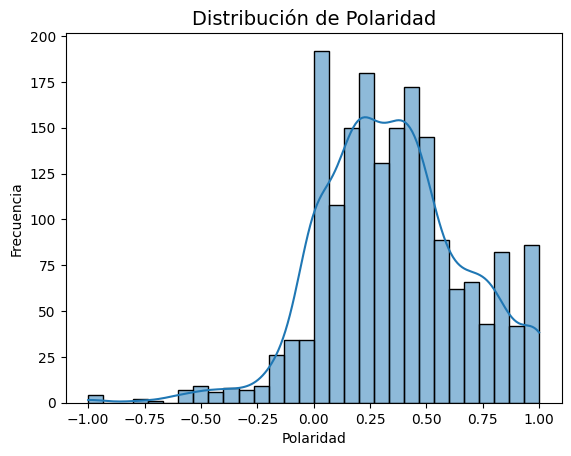

In [ ]:
sns.histplot(df['polarity'], bins=30, kde=True)
plt.title('Distribución de Polaridad', fontsize=14)
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()

En este gráfico podemos ver la distribución de la polaridad de las reseñas obtenidas.

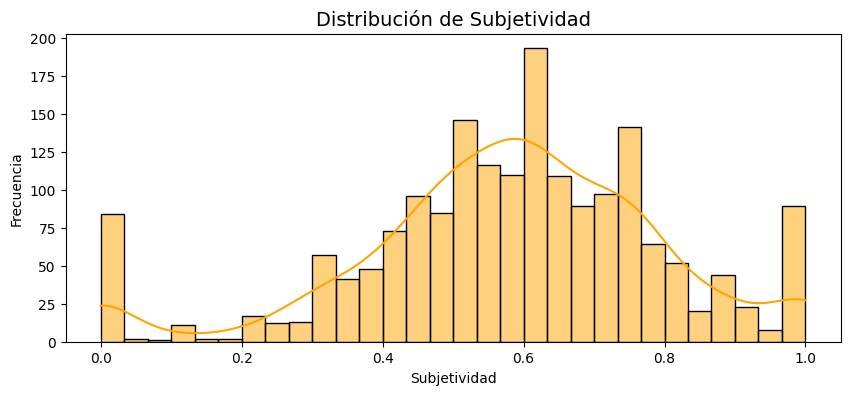

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['subjectivity'], bins=30, kde=True, color='orange')
plt.title('Distribución de Subjetividad', fontsize=14)
plt.xlabel('Subjetividad')
plt.ylabel('Frecuencia')
plt.show()

En este gráfico podemos ver la distribución de la subjetividad de las reseñas obtenidas.

### Bag of Words:
Es una representación numérica del texto que cuenta cuántas veces aparece cada palabra en un documento, ignorando el orden.

In [ ]:
bow = CountVectorizer()
X_bow = bow.fit_transform(df['clean_text'])
print("Bag of Words shape:", X_bow.shape)

Bag of Words shape: (1845, 4444)


In [ ]:
bow_counts = np.asarray(X_bow.sum(axis=0)).ravel()
bow_features = bow.get_feature_names_out()
bow_df = pd.DataFrame({'term': bow_features, 'frequency': bow_counts})
top_bow = bow_df.sort_values('frequency', ascending=False).head(10)
print("Top 10 términos más frecuentes (BOW):")
display(top_bow)

Top 10 términos más frecuentes (BOW):


,term,frequency
1706,great,490
1662,good,448
4330,wine,400
3899,taste,356
2229,love,316
2163,like,316
1189,drink,300
2410,mix,257
2638,one,252
445,bottle,239


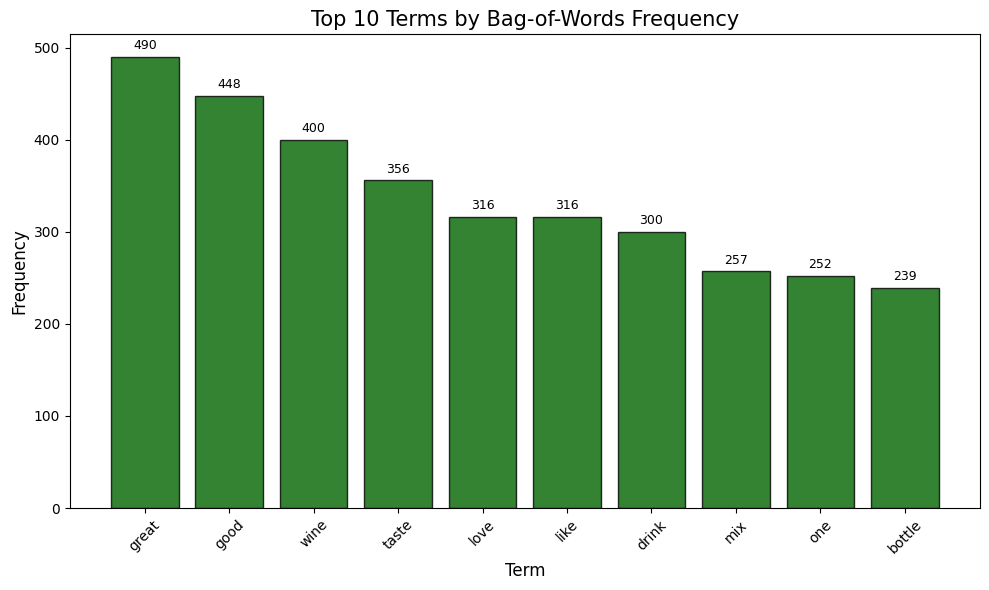

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.bar(top_bow['term'], top_bow['frequency'], color='darkgreen', alpha=0.8, edgecolor='black')
plt.xlabel('Term', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 Terms by Bag-of-Words Frequency', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
for bar, freq in zip(bars, top_bow['frequency']):
    plt.text(bar.get_x() + bar.get_width()/2, freq + 5, int(freq), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### TF-IDF(Term Frequency-Inverse Document Frequency):
Es una técnica que pondera la importancia de cada palabra en un documento respecto a todo el corpus:

**TF (Frecuencia del Término)**: Cuántas veces aparece una palabra en un documento.

**IDF (Frecuencia Inversa en el Corpus)**: Penaliza palabras que aparecen en muchos documentos (ej: "great").  

TF-IDF = TF * IDF




In [ ]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['clean_text'])
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (1845, 4444)


In [ ]:
tfidf_means = np.asarray(X_tfidf.mean(axis=0)).ravel()
tfidf_features = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame({'term': tfidf_features, 'tfidf': tfidf_means})
top_tfidf = tfidf_df.sort_values('tfidf', ascending=False).head(10)
print("Top 10 términos por TF-IDF medio:")
display(top_tfidf)

Top 10 términos por TF-IDF medio:


,term,tfidf
1706,great,0.047048
1662,good,0.039131
3899,taste,0.031632
2229,love,0.030909
4330,wine,0.025532
2410,mix,0.024390
1189,drink,0.023899
363,best,0.021709
2971,product,0.020749
2163,like,0.020220


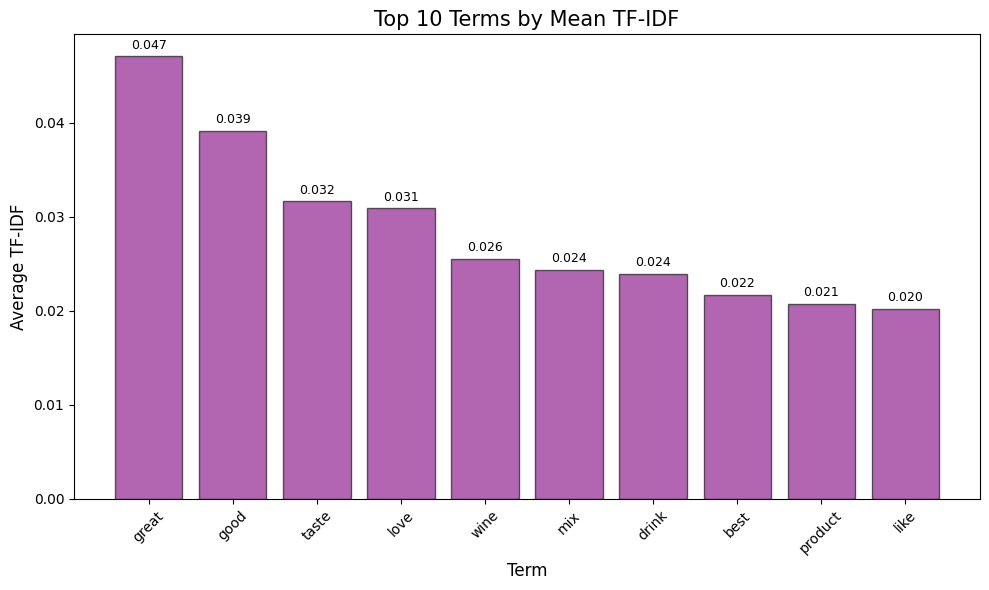

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.bar(top_tfidf['term'], top_tfidf['tfidf'], color='purple', alpha=0.6, edgecolor='black')
plt.xlabel('Term', fontsize=12)
plt.ylabel('Average TF-IDF', fontsize=12)
plt.title('Top 10 Terms by Mean TF-IDF', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
for bar, val in zip(bars, top_tfidf['tfidf']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.0005, f"{val:.3f}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

##Creación y evaluación de modelos de clasificación:
Vamos a usar TF-IDF y BOW como características para entrenar modelos de clasificación.

### Preprocesamiento

In [ ]:
y = df['sentiment_label'] #Variable a target

general_features = X_tfidf #Usando TF-IDF

general_features_bow = X_bow #Usando TF-IDF

In [ ]:
# Creamos los conjuntos de train y test (70/30):

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(general_features, y, test_size=0.3, random_state=42, stratify=y)

X_train_bow, X_test_bow, _, _ = train_test_split(general_features_bow, y, test_size=0.3, random_state=42, stratify=y)

### Modelado y entrenamiento:

In [ ]:
# Función para entrenar y evaluar un modelo dado

def train_eval_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== Resultados para {name} ===")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### Modelo MultinomialNB:

Para **TF-IDF:**

=== Resultados para NB TF-IDF ===
              precision    recall  f1-score   support

           0       1.00      0.06      0.11       159
           1       0.72      1.00      0.84       395

    accuracy                           0.73       554
   macro avg       0.86      0.53      0.47       554
weighted avg       0.80      0.73      0.63       554



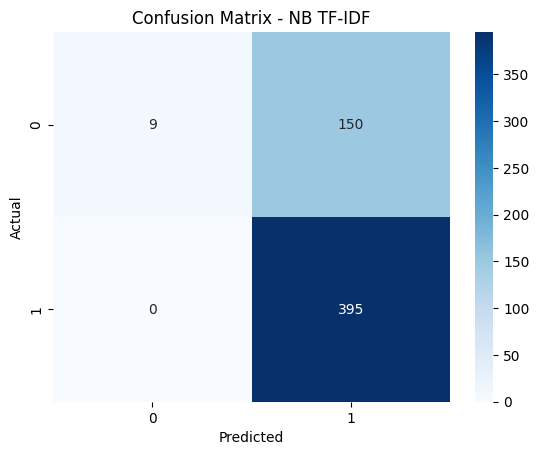

In [ ]:
dnb = MultinomialNB()
train_eval_model(dnb, X_train_tfidf, X_test_tfidf, y_train, y_test, 'NB TF-IDF')

Para **BOW**:

=== Resultados para NB BOW ===
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       159
           1       0.79      0.91      0.85       395

    accuracy                           0.77       554
   macro avg       0.72      0.66      0.67       554
weighted avg       0.75      0.77      0.75       554



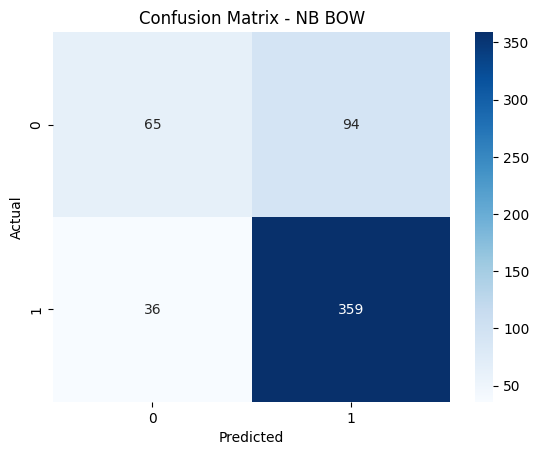

In [ ]:
dnb_bow = MultinomialNB()
train_eval_model(dnb_bow, X_train_bow, X_test_bow, y_train, y_test, 'NB BOW')

#### Modelo Logistic Regression:

Para **TF-IDF**:

=== Resultados para LogReg TF-IDF ===
              precision    recall  f1-score   support

           0       0.82      0.18      0.29       159
           1       0.75      0.98      0.85       395

    accuracy                           0.75       554
   macro avg       0.79      0.58      0.57       554
weighted avg       0.77      0.75      0.69       554



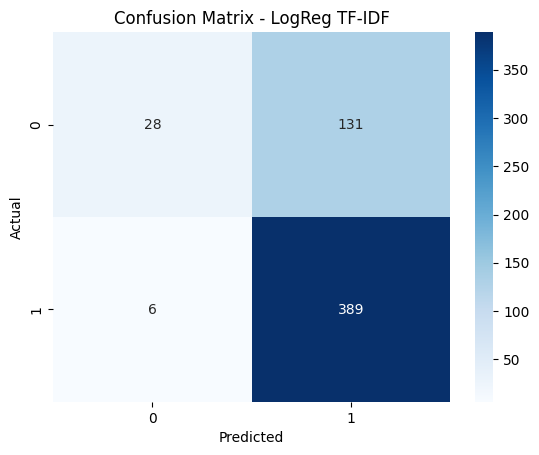

In [ ]:
logreg = LogisticRegression(max_iter=1000)
train_eval_model(logreg, X_train_tfidf, X_test_tfidf, y_train, y_test, 'LogReg TF-IDF')

Para **BOW**:

=== Resultados para LogReg BOW ===
              precision    recall  f1-score   support

           0       0.60      0.31      0.41       159
           1       0.77      0.91      0.83       395

    accuracy                           0.74       554
   macro avg       0.68      0.61      0.62       554
weighted avg       0.72      0.74      0.71       554



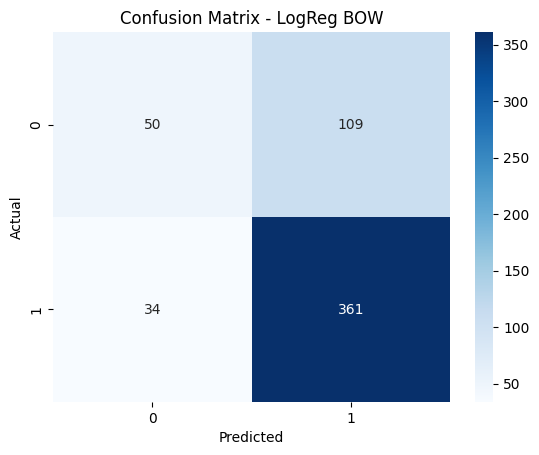

In [ ]:
logreg_bow = LogisticRegression(max_iter=1000)
train_eval_model(logreg_bow, X_train_bow, X_test_bow, y_train, y_test, 'LogReg BOW')

#### Modelo Random Forest:

Para **TF-IDF**:

=== Resultados para Random Forest TF-IDF ===
              precision    recall  f1-score   support

           0       0.53      0.19      0.28       159
           1       0.74      0.93      0.82       395

    accuracy                           0.72       554
   macro avg       0.63      0.56      0.55       554
weighted avg       0.68      0.72      0.67       554



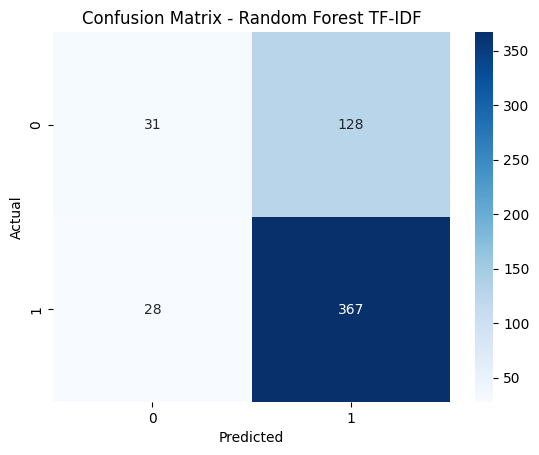

In [ ]:
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
train_eval_model(rf_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test, 'Random Forest TF-IDF')

Para **BOW**:

=== Resultados para Random Forest BOW ===
              precision    recall  f1-score   support

           0       0.60      0.32      0.42       159
           1       0.77      0.91      0.84       395

    accuracy                           0.74       554
   macro avg       0.68      0.62      0.63       554
weighted avg       0.72      0.74      0.72       554



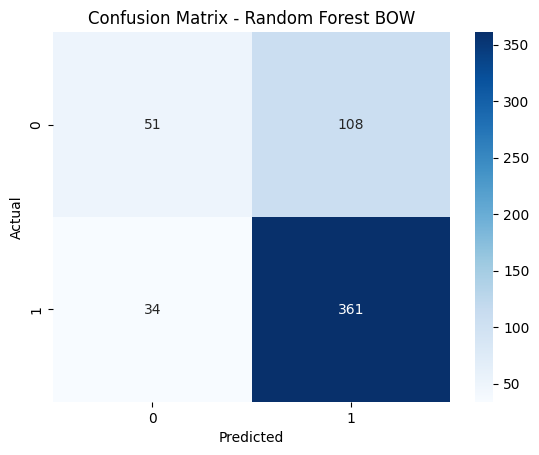

In [ ]:
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
train_eval_model(rf_bow, X_train_bow, X_test_bow, y_train, y_test, 'Random Forest BOW')

####Comparación de métricas obtenidas:

| Modelo              | Vec.   | Precisión (0) | Recall (0) | F1‑score (0) | Precisión (1) | Recall (1) | F1‑score (1) | Accuracy |
| ------------------- | ------ | ------------- | ---------- | ------------ | ------------- | ---------- | ------------ | -------- |
| NB                  | TF‑IDF | 1.00          | 0.06       | 0.11         | 0.72          | 1.00       | 0.84         | 0.73     |
| NB                  | BOW    | 0.64          | 0.41       | 0.50         | 0.79          | 0.91       | 0.85         | 0.77     |
| Logistic Regression | TF‑IDF | 0.82          | 0.18       | 0.29         | 0.75          | 0.98       | 0.85         | 0.75     |
| Logistic Regression | BOW    | 0.60          | 0.31       | 0.41         | 0.77          | 0.91       | 0.83         | 0.74     |
| Random Forest       | TF‑IDF | 0.53          | 0.19       | 0.28         | 0.74          | 0.93       | 0.82         | 0.72     |
| Random Forest       | BOW    | 0.60          | 0.32       | 0.42         | 0.77          | 0.91       | 0.84         | 0.74     |

Podemos ver que la mayoría de modelos son muy buenos prediciendo las reseñas de sentimiento positivo (Valor 1) y malos o regulares en predecir las reseñas de sentimiento negativo (Valor 0).  

Esto puede deberse a como nombramos anteriormente, el modelo se entrena con muchas reseñas positivas y pocas negativas, volviendose muy bueno prediciendo las positivas y malo con las negativas.

Por otro lado, el modelo que mejor performó fue el **<u>Multinomial NB utilizando como carácteristicas Bag of Words</u>**, logrando como el mejor accuracy (0.77) y un balance razonable entre precision y recall para la clase negativa (0) y positiva (1).

####Evaluación del modelo en reseñas nuevas:
Con el fin de testear el modelo que mejor performó, se le solicitó a la inteligencia artificial generar 5 reseñas positivas y 5 reseñas negativas para aplicarlas al modelo.

In [ ]:
ia_reviews = [
    "Absolutely loved this Pinot Noir – silky tannins, bright cherry notes, and a long, elegant finish.", #Positiva
    "This cocktail was perfectly balanced: the sweetness of the peach syrup paired beautifully with the tartness of the lime.", #Positiva
    "Incredible aroma of vanilla and oak on the nose, and the palate is rich and smooth. Highly recommended!", #Positiva
    "The Riesling’s crisp acidity and honeyed fruit make it wonderfully refreshing on a warm evening.", #Positiva
    "Outstanding value for the price – a full‑bodied red with layers of dark berry and subtle spice.", #Positiva
    "Unfortunately this Merlot was thin and watery, with a vegetal aftertaste that made it difficult to enjoy.", #Negativa
    "Too much artificial sweetness in this cocktail – it overpowers the spirits and leaves a cloying finish.", #Negativa
    "I found the Chardonnay overly oaky and buttery, masking any real fruit character.", #Negativa
    "Harsh bitterness and astringency dominate this IPA; I couldn’t get past the unpleasant mouthfeel.", #Negativa
    "This rosé tasted flat and vinegar‑like, lacking any of the bright strawberry notes I expected." #Negativa
]

In [ ]:
ia_clean = [preprocess(r) for r in ia_reviews]

# Vectorizamos con BOW
ia_bow = bow.transform(ia_clean)

# Predecir sentimiento con MultinomialNB
ia_preds = dnb_bow.predict(ia_bow)

print("Resultados de sentimiento para reseñas generadas por IA:")
for review, label in zip(ia_reviews, ia_preds):
    sentiment = 'Positive' if label == 1 else 'Negative'
    print(f"- [{sentiment}] {review}")

Resultados de sentimiento para reseñas generadas por IA:
- [Positive] Absolutely loved this Pinot Noir – silky tannins, bright cherry notes, and a long, elegant finish.
- [Positive] This cocktail was perfectly balanced: the sweetness of the peach syrup paired beautifully with the tartness of the lime.
- [Positive] Incredible aroma of vanilla and oak on the nose, and the palate is rich and smooth. Highly recommended!
- [Positive] The Riesling’s crisp acidity and honeyed fruit make it wonderfully refreshing on a warm evening.
- [Positive] Outstanding value for the price – a full‑bodied red with layers of dark berry and subtle spice.
- [Negative] Unfortunately this Merlot was thin and watery, with a vegetal aftertaste that made it difficult to enjoy.
- [Positive] Too much artificial sweetness in this cocktail – it overpowers the spirits and leaves a cloying finish.
- [Negative] I found the Chardonnay overly oaky and buttery, masking any real fruit character.
- [Negative] Harsh bitterness 

| Review                                                                                                                   | Predicted | Actual   |
| ------------------------------------------------------------------------------------------------------------------------ | --------- | -------- |
| Absolutely loved this Pinot Noir – silky tannins, bright cherry notes, and a long, elegant finish.                       | Positive  | Positive |
| This cocktail was perfectly balanced: the sweetness of the peach syrup paired beautifully with the tartness of the lime. | Positive  | Positive |
| Incredible aroma of vanilla and oak on the nose, and the palate is rich and smooth. Highly recommended!                  | Positive  | Positive |
| The Riesling’s crisp acidity and honeyed fruit make it wonderfully refreshing on a warm evening.                         | Positive  | Positive |
| Outstanding value for the price – a full‑bodied red with layers of dark berry and subtle spice.                          | Positive  | Positive |
| Unfortunately this Merlot was thin and watery, with a vegetal aftertaste that made it difficult to enjoy.                | Negative  | Negative |
| Too much artificial sweetness in this cocktail – it overpowers the spirits and leaves a cloying finish.                  | Positive  | Negative |
| I found the Chardonnay overly oaky and buttery, masking any real fruit character.                                        | Negative  | Negative |
| Harsh bitterness and astringency dominate this IPA; I couldn’t get past the unpleasant mouthfeel.                        | Negative  | Negative |
| This rosé tasted flat and vinegar‑like, lacking any of the bright strawberry notes I expected.                           | Negative  | Negative |



Podemos apreciar que tuvo un 90% de exito. Se equivocó justamente donde peor predice, en un sentimiento que es negativo y prediciendoló como positivo.

##**Conclusiones**:

Dentro del proyecto de NLP se realizaron las siguientes actividades:
* Carga de dataset y limpieza de los datos.

* Análisis exploratorio de datos. Compresión de los datos. Estadisticas. Visualizaciones.

* Preprocesamiento: limpieza, tokenización, remoción de stopwords, lematización.

* Exploración: Distribuciones de palabras, WordCloud, n‑gramas y análisis de sentimiento con TextBlop y una segmentación de reseñas entre positivas y negativas.

* Vectorización: TF‑IDF y Bag‑of‑Words.

* Modelado: Multinomial, Regresión Logística y Random Forest; se realizaron evaluaciones con classification report y matrices de confusión.

Se obtuvo un modelo que mejor performó y se lo evaluó con nuevas reseñas con las que no fue entrenado. Obteniendo así un buen nivel de performance del 90%.

###**Aspectos a mejorar**:
* **Trabajo con el dataset**: Se podría limpiar mejor los datos y buscar un mejor equilibrio entre la cantidad de reviews positivas y negativas. Posiblemente un crossvalidation pueda solucionar eso o técnicas como SMOTE o undersampling si las clases siguen desbalanceadas.

* **Segmentación en puntaje de reseñas**: En este proyecto se dividieron los puntajes de 1 a 5 en dos sentimientos posibles.  
Los puntajes de 1 a 3 indicaban sentimiento negativo y de 4 a 5 sentimiento positivo.  
Puede que el incluir puntaje "3" en sentimiento negativo no sea una buena opción, ya que introduce ruido a la hora de entrenar el modelo. Este "ruido" se genera debido a que los textos de las reseñas de puntaje 3 suelen ser neutrales o levemente positivas pero no negativas.

* **Tuiperparámetros en modelos**: Con el uso de GridSearch o otro buscador de hiperparámetros se podría optimizar la performance de cada uno, mejorando sus métricas de predicción/clasificación.

* **Modelos alternativos**: FastText o Word2Vec para representar tokens como embeddings densos y usar un modelo más profundo (p.ej. LSTM).

### Otros temas a explorar:

* **Libreria spaCy**: Para un preprocesamiento más sofisticado (NER, dependencias) y vectores de palabras preentrenados.

* **Transformers (BERT, RoBERTa)**: fine‑tuning de un modelo de lenguaje contextualizado para mejorar la capacidad de entender matices de opinión.